✅ Decision Trees (Supervised Learning - Classification & Regression)

🌳 What are Decision Trees?
A Decision Tree splits data into branches based on feature values until it reaches a decision. It’s like a flowchart with “if...else” conditions.

🧠 Why It Matters:
Easy to understand and visualize

Works for both classification and regression

Can overfit easily → handled by pruning or using ensembles (Random Forests)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load data
data = load_iris()
X = data.data
y = data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


🌲 max_depth in Decision Trees
Definition:
max_depth controls how deep the decision tree is allowed to grow.

Why it matters:

Too deep (high depth): Overfits the training data (high accuracy on train, poor on test)

Too shallow (low depth): Underfits — not enough splits to capture patterns
# model = DecisionTreeClassifier(max_depth=3) #👉 Limits the tree to 3 levels deep, which helps generalization.



🔍 One-liner Explanation:
Decision Trees split data using feature conditions to classify or predict values — very interpretable but prone to overfitting.



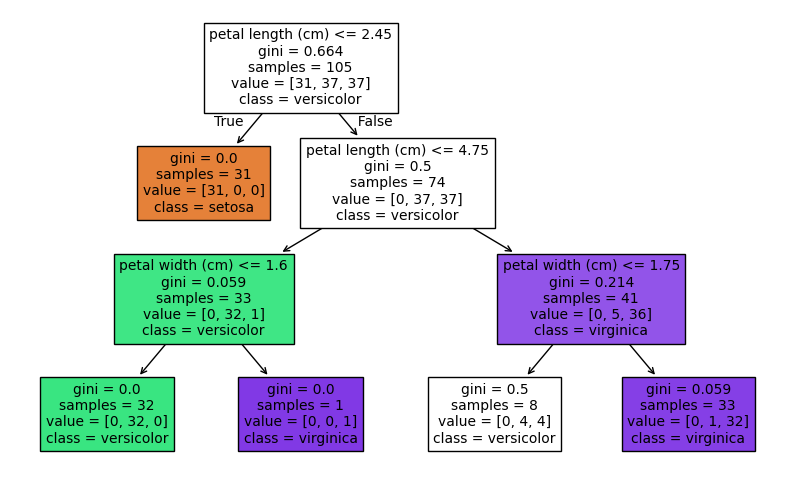

In [26]:
# ✅ Next: Visualize the Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


🌳 Decision Tree for Regression
Just like classification, but instead of predicting categories, it predicts continuous values (like house price, salary, etc.)

🧠 Key difference:
# Classifier: Splits to maximize purity (e.g. Gini, Entropy)
# Regressor: Splits to minimize variance (uses MSE)

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load housing data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
print("X_train", X_train, end="\n")
print("X_test", X_test, end="\n")
print("y_train", y_train, end="\n")
print("y_test",y_test, end="\n")
# Model
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)

# Predict
preds = reg_tree.predict(X_test)
print("preds", preds)
print("MSE:", mean_squared_error(y_test, preds))


X_train [[   3.2596       33.            5.0176565  ...    3.6918138
    32.71       -117.03      ]
 [   3.8125       49.            4.47354497 ...    1.73809524
    33.77       -118.16      ]
 [   4.1563        4.            5.64583333 ...    2.72321429
    34.66       -120.48      ]
 ...
 [   2.9344       36.            3.98671727 ...    3.33206831
    34.03       -118.38      ]
 [   5.7192       15.            6.39534884 ...    3.17889088
    37.58       -121.96      ]
 [   2.5755       52.            3.40257649 ...    2.10869565
    37.77       -122.42      ]]
X_test [[   1.6812       25.            4.19220056 ...    3.87743733
    36.06       -119.01      ]
 [   2.5313       30.            5.03938356 ...    2.67979452
    35.14       -119.46      ]
 [   3.4801       52.            3.97715472 ...    1.36033229
    37.8        -122.44      ]
 ...
 [   9.2298       25.            7.23767606 ...    2.79049296
    37.31       -122.05      ]
 [   2.785        36.            5.28902954 .

✅ Mini Project: "Student Performance Prediction" using Decision Tree (Regression)

We’ll predict a student’s final exam score based on their study hours, attendance, and assignment grades.

In [33]:
# 📁 Step 1: Create dataset
import pandas as pd
import numpy as np

np.random.seed(42)

n = 100
df = pd.DataFrame({
    'StudyHours': np.random.normal(5, 2, n).clip(0),   # avg 5 hrs/day
    'Attendance': np.random.normal(85, 10, n).clip(60,100),
    'AssignmentScore': np.random.normal(75, 15, n).clip(0, 100),
})

# Target variable (final exam score)
df['FinalScore'] = (df['StudyHours'] * 10 +
                    df['Attendance'] * 0.3 +
                    df['AssignmentScore'] * 0.5 +
                    np.random.normal(0, 5, n)).clip(0, 100)

df.head()


,StudyHours,Attendance,AssignmentScore,FinalScore
0,5.993428,70.846293,80.366810,100.000000
1,4.723471,80.793547,83.411768,100.000000
2,6.295377,81.572855,91.245769,100.000000
3,8.046060,76.977227,90.807031,100.000000
4,4.531693,83.387143,54.334959,97.396047


In [34]:
# 📊 Step 2: Train-test split
from sklearn.model_selection import train_test_split

X = df[['StudyHours', 'Attendance', 'AssignmentScore']]
y = df['FinalScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# 🌳 Step 3: Train a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))


MSE: 11.576118395170772


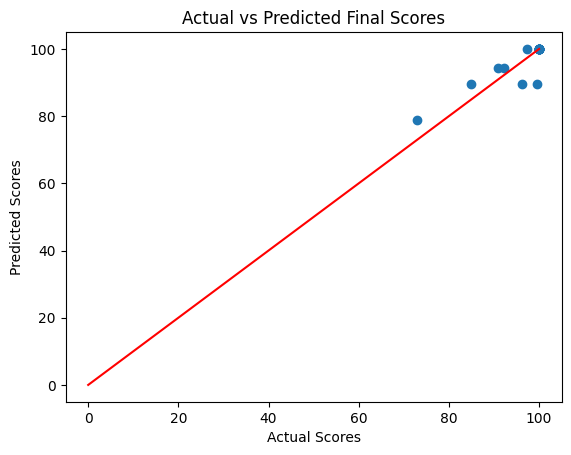

In [36]:
# 📈 Step 4: Plot actual vs predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, preds)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Final Scores")
plt.plot([0,100],[0,100], color='red')  # ideal line
plt.show()


💡 Bonus:
Visualize the tree using plot_tree

Try with RandomForestRegressor and compare performance

🧠 Quick Recap Quiz (Answer in 1 line each):
Why max_depth=4?
✔️ Correct idea. Better phrased as:
➤ To limit tree growth and prevent overfitting on training data.

What happens without depth limit?
✔️ You said “overfitting” — that’s correct.
➤ Tree may memorize training data and perform poorly on unseen data.

Which input feature was most influential?
✔️ You said “predicted” — not quite right.
➤ It should be the feature that best splits the data (e.g., Study Hours, if used).
Let me know your features and I can confirm.

What does red diagonal line mean?
✔️ “Separating predicted and actual” is close.
➤ It shows perfect predictions — where predicted = actual.

🌲 RANDOM FOREST: Key Concept

A Random Forest builds multiple decision trees and takes the majority vote (for classification) or average (for regression) — improving accuracy and reducing overfitting.


✅ Why it matters:
Decision Tree	    Random Forest
Can overfit easily	Reduces overfitting using multiple trees
High variance	    Low variance, better generalization
Easy to interpret	Slightly harder, but more accurate

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# ⚙️ Important Parameters:
# Parameter	    Meaning
# n_estimators	No. of trees in the forest
# max_depth	    Max depth of each tree
# max_features	How many features to consider per split
# bootstrap=True	Uses random sampling with replacement

Accuracy: 1.0


🎯 Mini Project: "Student Pass Prediction"

Predict if a student will Pass or Fail based on Study Hours, Attendance, and Sleep Hours using a Random Forest Classifier.

## 🧪 Steps:
1. Data cleaning and preprocessing
2. Train-test split
3. RandomForestClassifier training
4. Hyperparameter tuning (GridSearchCV)
5. Evaluation (accuracy, classification report)
6. Saved final model

In [5]:
# 📁 STEP 1: Create or Load Data
import pandas as pd

# Simulated student data
data = {
    'StudyHours': [2, 5, 1, 4, 6, 7, 3, 8, 2, 9, 1, 6],
    'Attendance': [60, 85, 50, 75, 90, 95, 70, 100, 40, 88, 45, 92],
    'SleepHours': [5, 6, 4, 7, 6, 7, 5, 8, 3, 6, 2, 7],
    'Pass': [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df)


    StudyHours  Attendance  SleepHours  Pass
0            2          60           5     0
1            5          85           6     1
2            1          50           4     0
3            4          75           7     1
4            6          90           6     1
5            7          95           7     1
6            3          70           5     1
7            8         100           8     1
8            2          40           3     0
9            9          88           6     1
10           1          45           2     0
11           6          92           7     1


In [6]:
# 🔧 Preprocessing & Splitting
from sklearn.model_selection import train_test_split

X = df[['StudyHours', 'Attendance', 'SleepHours']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 🌳 Random Forest Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# 📊 Prediction
y_pred = model.predict(X_test)
print("Predicted:", y_pred)
print("Actual:   ", y_test.values)


Predicted: [0 1 0 0]
Actual:    [0 1 0 0]


In [9]:
# Evaluate Random Forest Model 🎯📈
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 📊 Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#🧾 Classification Report (Precision, Recall, F1)
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



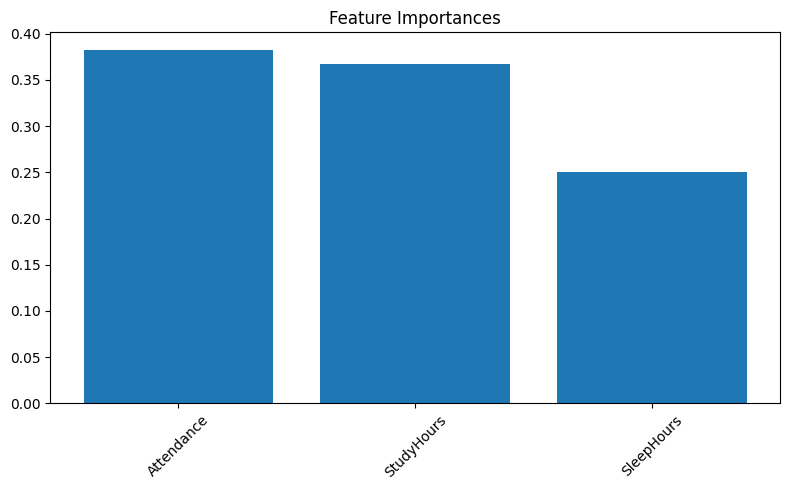

In [10]:
# ✅ STEP 4: Visualize Feature Importance 🔥📊
# Understanding which features are driving the model helps improve interpretability.
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

# Sort by importance
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# ✅ STEP 5: Hyperparameter Tuning with GridSearchCV 🛠️🌲
# We’ll now optimize the Random Forest by finding the best max_depth, n_estimators, etc.

# 🔧 Why It Matters:
# Default settings are not always optimal.
# Helps improve accuracy, avoid overfitting/underfitting.
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9
Test Accuracy: 0.75


In [12]:
# 💾 1. Save Trained Model
import joblib

# Save the model to disk
joblib.dump(best_model, 'random_forest_model.pkl')
print("✅ Model saved as random_forest_model.pkl")


✅ Model saved as random_forest_model.pkl


In [13]:
# To load later:
model = joblib.load('random_forest_model.pkl')
